#### Defining the date_to_season function

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

In [62]:
print("=== LOADING AND PREPROCESSING DATA ===")

# Load the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
print(f"Original data shape: {df.shape}")

=== LOADING AND PREPROCESSING DATA ===
Original data shape: (145460, 23)


In [63]:
# Data preprocessing steps
df = df.dropna()
df = df.rename(columns={'RainToday': 'RainYesterday', 'RainTomorrow': 'RainToday'})
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia'])]
print(f"After preprocessing shape: {df.shape}")

After preprocessing shape: (7557, 23)


In [64]:
# Define the CORRECTED date_to_season function (NO print statement)
def date_to_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

## Exercise 1: Map the dates to seasons and drop the Date column¶

In [65]:
print("\n=== EXERCISE 1: Map dates to seasons and drop Date column ===")
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Apply the function to the 'Date' column
df['Season'] = df['Date'].apply(date_to_season)

# Drop the Date column
df = df.drop(columns=['Date'])

print("Exercise 1 completed successfully!")
print(f"Season distribution:\n{df['Season'].value_counts()}")


=== EXERCISE 1: Map dates to seasons and drop Date column ===
Exercise 1 completed successfully!
Season distribution:
Season
Autumn    1947
Winter    1918
Spring    1911
Summer    1781
Name: count, dtype: int64


## Exercise 2. Define the feature and target dataframes

In [32]:
print("\n=== EXERCISE 2: Define the feature and target dataframes ===")
X = df.drop(columns='RainToday', axis=1)
y = df['RainToday']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


=== EXERCISE 2: Define the feature and target dataframes ===
Features (X) shape: (7557, 22)
Target (y) shape: (7557,)


## Exercise 3. How balanced are the classes?

In [33]:
print("\n=== EXERCISE 3: How balanced are the classes? ===")
class_counts = y.value_counts()
print("Class counts:")
print(class_counts)


=== EXERCISE 3: How balanced are the classes? ===
Class counts:
RainToday
No     5766
Yes    1791
Name: count, dtype: int64


## Exercise 4. What can you conclude from these counts?
1.How often does it rain annualy in the Melbourne area?

2.How accurate would you be if you just assumed it won't rain every day?

3.Is this a balanced dataset

4.Next steps?

1. It doesn’t rain every day. The data shows that there are usually many more dry days than rainy ones.
2. We would be pretty accurate. Since , there are more dry days than the rainy ones , we would be pretty right when we guess it .
3. No , it is not a balanced data.
4. Since the data is not balanced  , we need to be careful when making a model. Instead of only looking at accuracy , we would want to focus on how good the model is at spotting rainy days specifically and more accurately.

## Exercise 5. Split data into training and test sets, ensuring target stratification

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (6045, 22)
Test set shape: (1512, 22)


## Exercise 6. Automatically detect numerical and categorical columns and assign them to separate numeric and categorical features¶

In [67]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()  
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numeric features ({len(numeric_features)})")
print(f"Categorical features ({len(categorical_features)})")

Numeric features (16)
Categorical features (6)


## Exercise 7. Combine the transformers into a single preprocessing column transformer

In [36]:
print("\n=== EXERCISE 7: Combine transformers into preprocessing pipeline ===")
# Define transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
print("Preprocessor created successfully!")


=== EXERCISE 7: Combine transformers into preprocessing pipeline ===
Preprocessor created successfully!


## Exercise 8. Create a pipeline by combining the preprocessing with a Random Forest classifier¶

In [38]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


## Exercise 9. Instantiate and fit GridSearchCV to the pipeline

In [40]:
print("\n=== EXERCISE 9: Instantiate and fit GridSearchCV ===")
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)  
grid_search.fit(X_train, y_train)

print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))


=== EXERCISE 9: Instantiate and fit GridSearchCV ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters found:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 0.8524


## Exercise 10. Display your model's estimated score

In [41]:
print("\n=== EXERCISE 10: Display model's estimated score ===")
test_score = grid_search.score(X_test, y_test)  
print("Test set score: {:.4f}".format(test_score))


=== EXERCISE 10: Display model's estimated score ===
Test set score: 0.8446


## Exercise 11. Get the model predictions from the grid search estimator on the unseen data

In [42]:
print("\n=== EXERCISE 11: Get model predictions ===")
y_pred = grid_search.predict(X_test)


=== EXERCISE 11: Get model predictions ===


## Exercise 12. Print the classification report

In [43]:
print("\n=== EXERCISE 12: Print classification report ===")
print("Classification Report:")
print(classification_report(y_test, y_pred))


=== EXERCISE 12: Print classification report ===
Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.75      0.51      0.61       358

    accuracy                           0.84      1512
   macro avg       0.81      0.73      0.76      1512
weighted avg       0.84      0.84      0.83      1512



## Exercise 13. Plot the confusion matrix


=== EXERCISE 13: Plot confusion matrix ===
Confusion Matrix:
[[1094   60]
 [ 175  183]]
True Positive Rate: 0.5112


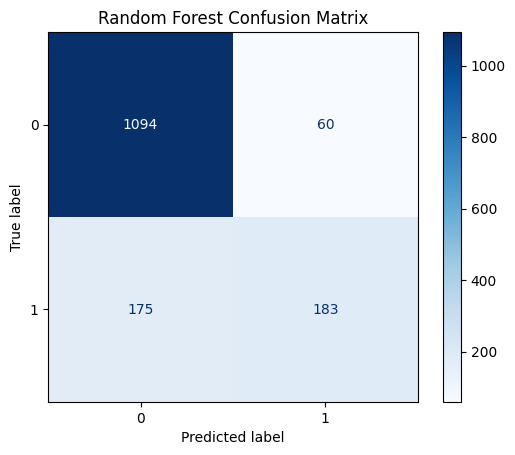

In [45]:
print("\n=== EXERCISE 13: Plot confusion matrix ===")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
tn, fp, fn, tp = conf_matrix.ravel()
true_positive_rate = tp / (tp + fn)
print(f"True Positive Rate: {true_positive_rate:.4f}")

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Exercise 14. Extract the feature importances


=== EXERCISE 14: Extract feature importances ===
Top 10 most important features:
          Feature  Importance
9     Humidity3pm    0.120752
11    Pressure3pm    0.090827
10    Pressure9am    0.085730
4        Sunshine    0.081560
5   WindGustSpeed    0.050779
15        Temp3pm    0.045733
1         MaxTemp    0.041407
0         MinTemp    0.040418
14        Temp9am    0.039146
8     Humidity9am    0.036119
Most important feature: Humidity3pm


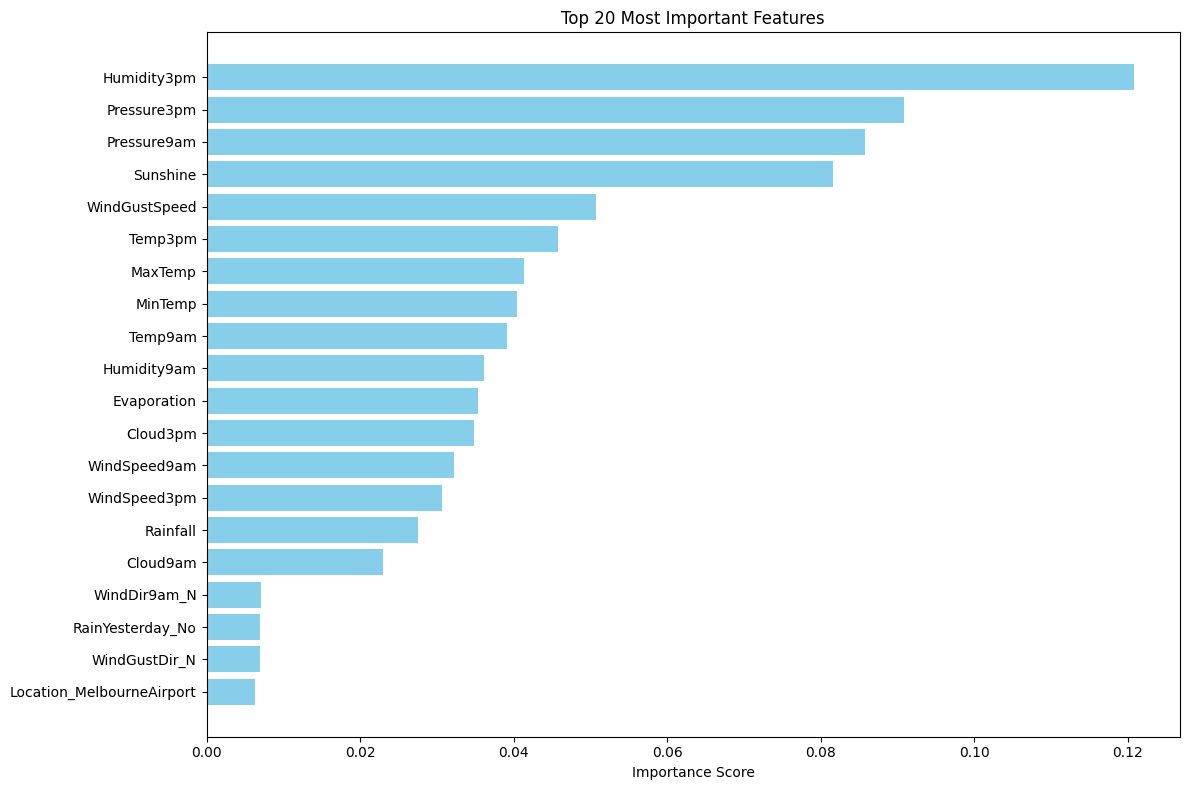

In [68]:
print("\n=== EXERCISE 14: Extract feature importances ===")
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

# Get feature names
feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

# Create importance dataframe
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 most important features:")
print(importance_df.head(10))

most_important_feature = importance_df.iloc[0]['Feature']
print(f"Most important feature: {most_important_feature}")

# Plot feature importances
N = 20
top_features = importance_df.head(N)
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title(f'Top {N} Most Important Features')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


## Exercise 15. Update the pipeline and the parameter grid


=== EXERCISE 15: Update pipeline for Logistic Regression ===
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Logistic Regression Results:
Best parameters: {'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best CV score: 0.8372
Test score: 0.8300

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.69      0.51      0.59       358

    accuracy                           0.83      1512
   macro avg       0.77      0.72      0.74      1512
weighted avg       0.82      0.83      0.82      1512

Confusion Matrix for Logistic Regression:
[[1071   83]
 [ 174  184]]


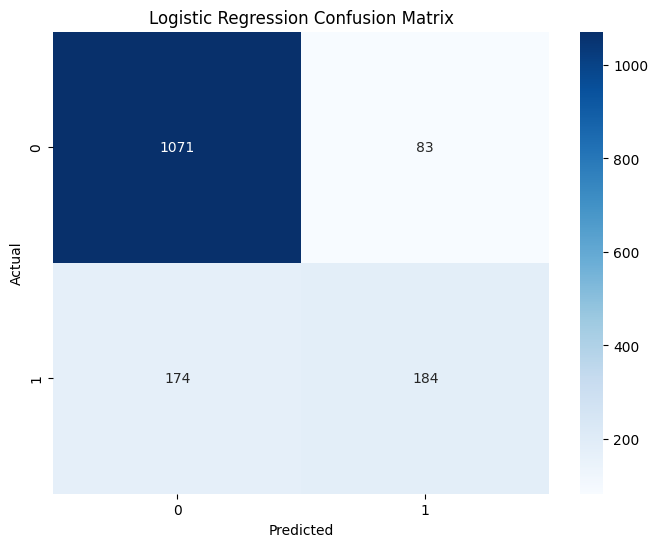

In [50]:
print("\n=== EXERCISE 15: Update pipeline for Logistic Regression ===")
# Create new pipeline with LogisticRegression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Define parameter grid for Logistic Regression
lr_param_grid = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

# Create and fit GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=cv, scoring='accuracy', verbose=1)
lr_grid_search.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_lr = lr_grid_search.predict(X_test)

print("Logistic Regression Results:")
print("Best parameters:", lr_grid_search.best_params_)
print(f"Best CV score: {lr_grid_search.best_score_:.4f}")
print(f"Test score: {lr_grid_search.score(X_test, y_test):.4f}")

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###  Compare the results to your previous model.

In [69]:
print("\n" + "="*60)
print("FINAL MODEL COMPARISON")
print("="*60)

# Calculate final metrics
rf_accuracy = grid_search.score(X_test, y_test)
lr_accuracy = lr_grid_search.score(X_test, y_test)

tn_lr, fp_lr, fn_lr, tp_lr = conf_matrix_lr.ravel()
lr_tpr = tp_lr / (tp_lr + fn_lr)

print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, TPR: {true_positive_rate:.4f}")
print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, TPR: {lr_tpr:.4f}")




FINAL MODEL COMPARISON
Random Forest - Accuracy: 0.8446, TPR: 0.5112
Logistic Regression - Accuracy: 0.8300, TPR: 0.5140
